## EDA: PART A

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

sns.set_style('whitegrid')

In [2]:
train_df = pd.read_csv('train.csv')

train_df.shape

(891, 12)

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA: PART B

In [7]:
train_df.drop('PassengerId', axis=1).describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
def label_chart(plot, points='.0f'):
    for p in plot.patches:
        plot.annotate(format(p.get_height(), points), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

In [9]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
round(train_df['Survived'].value_counts(normalize=True)*100, 2)

0    61.62
1    38.38
Name: Survived, dtype: float64

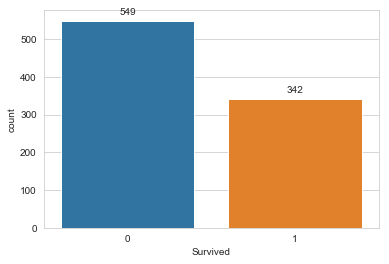

In [11]:
label_chart(sns.countplot(train_df['Survived']))

In [12]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
round(train_df['Pclass'].value_counts(normalize=True)*100, 2)

3    55.11
1    24.24
2    20.65
Name: Pclass, dtype: float64

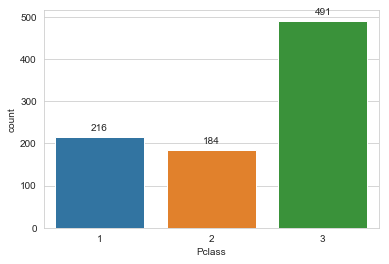

In [14]:
label_chart(sns.countplot(train_df['Pclass']))

In [15]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
round(train_df['Sex'].value_counts(normalize=True)*100, 2)

male      64.76
female    35.24
Name: Sex, dtype: float64

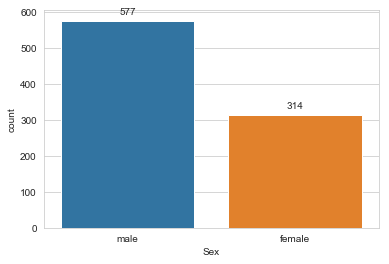

In [17]:
label_chart(sns.countplot(train_df['Sex']))

In [18]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
round(train_df['Embarked'].value_counts(normalize=True)*100, 2)

S    72.44
C    18.90
Q     8.66
Name: Embarked, dtype: float64

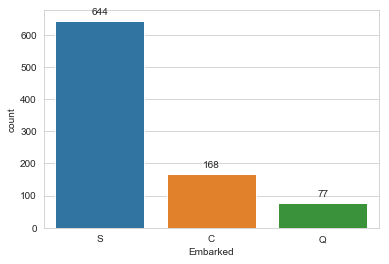

In [20]:
label_chart(sns.countplot(train_df['Embarked']))

In [21]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [22]:
round(train_df['SibSp'].value_counts(normalize=True)*100, 2)

0    68.24
1    23.46
2     3.14
4     2.02
3     1.80
8     0.79
5     0.56
Name: SibSp, dtype: float64

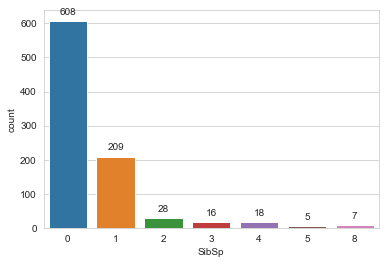

In [23]:
label_chart(sns.countplot(train_df['SibSp']))

In [24]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [25]:
round(train_df['Parch'].value_counts(normalize=True)*100, 2)

0    76.09
1    13.24
2     8.98
5     0.56
3     0.56
4     0.45
6     0.11
Name: Parch, dtype: float64

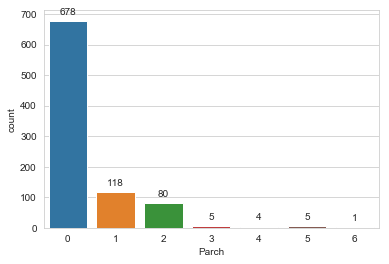

In [26]:
label_chart(sns.countplot(train_df['Parch']))

In [27]:
train_df['Ticket'].value_counts()

347082                7
1601                  7
CA. 2343              7
CA 2144               6
347088                6
3101295               6
S.O.C. 14879          5
382652                5
4133                  4
347077                4
19950                 4
2666                  4
LINE                  4
349909                4
113760                4
PC 17757              4
W./C. 6608            4
113781                4
17421                 4
24160                 3
363291                3
F.C.C. 13529          3
35273                 3
239853                3
347742                3
PC 17582              3
230080                3
PC 17755              3
SC/Paris 2123         3
PC 17572              3
110413                3
345773                3
13502                 3
C.A. 34651            3
C.A. 31921            3
29106                 3
371110                3
248727                3
PC 17760              3
110152                3
2908                  2
239865          

In [28]:
train_df['Cabin'].value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
E101               3
D                  3
F33                3
F2                 3
C22 C26            3
D26                2
E67                2
C124               2
D17                2
B51 B53 B55        2
D35                2
C52                2
C92                2
C78                2
D36                2
D33                2
F G73              2
C126               2
C83                2
D20                2
C65                2
B18                2
C93                2
B58 B60            2
E121               2
E8                 2
E44                2
E33                2
E24                2
B22                2
F4                 2
B57 B59 B63 B66    2
C123               2
E25                2
B77                2
B35                2
C2                 2
C125               2
B28                2
C68                2
B20                2
B5                 2
B49                2
C128               1
B4           

## EDA: PART C

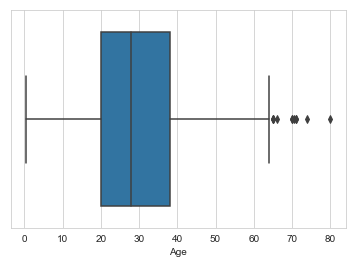

In [29]:
sns.boxplot(train_df['Age'])

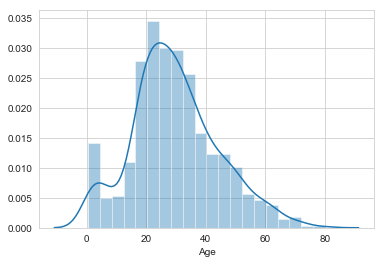

In [30]:
sns.distplot(train_df[train_df.Age.notnull()].Age)

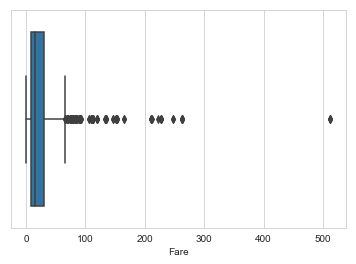

In [31]:
sns.boxplot(train_df['Fare'])

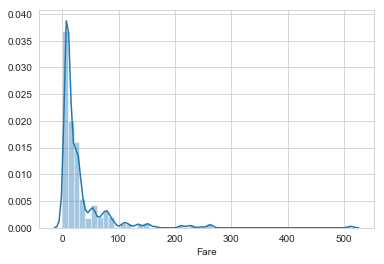

In [32]:
sns.distplot(train_df[train_df.Fare.notnull()].Fare)

## EDA: PART D

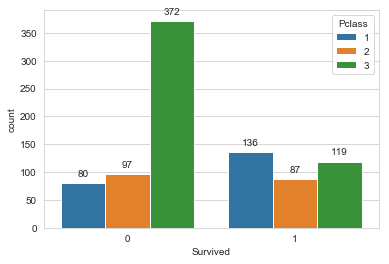

In [33]:
label_chart(sns.countplot(train_df['Survived'], hue=train_df['Pclass']))

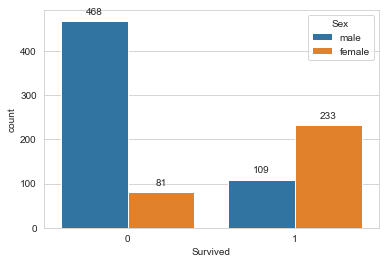

In [34]:
label_chart(sns.countplot(train_df['Survived'], hue=train_df['Sex']))

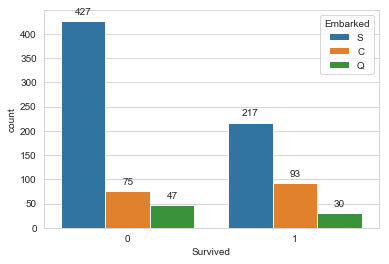

In [35]:
label_chart(sns.countplot(train_df['Survived'], hue=train_df['Embarked']))

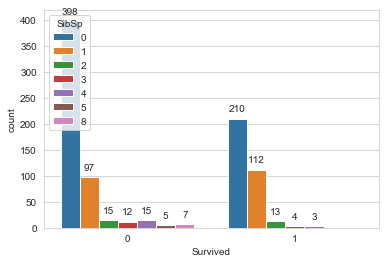

In [36]:
label_chart(sns.countplot(train_df['Survived'], hue=train_df['SibSp']))

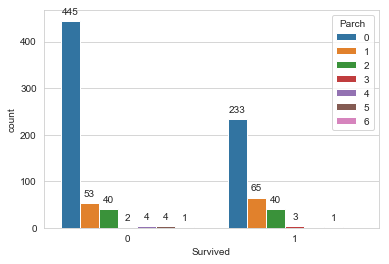

In [37]:
label_chart(sns.countplot(train_df['Survived'], hue=train_df['Parch']))

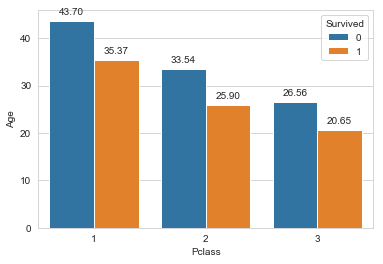

In [51]:
label_chart(sns.barplot(x='Pclass', y='Age', data=train_df, hue='Survived', ci=None), points='.2f')

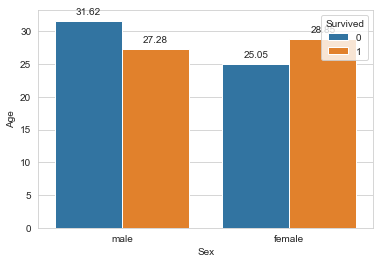

In [39]:
label_chart(sns.barplot(x='Sex', y='Age', data=train_df, hue='Survived', ci=None), points='.2f')

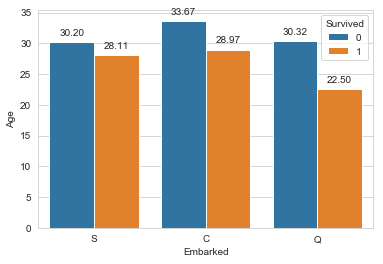

In [40]:
label_chart(sns.barplot(x='Embarked', y='Age', data=train_df, hue='Survived', ci=None), points='.2f')

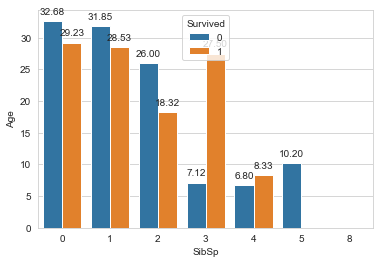

In [41]:
label_chart(sns.barplot(x='SibSp', y='Age', data=train_df, hue='Survived', ci=None), points='.2f')

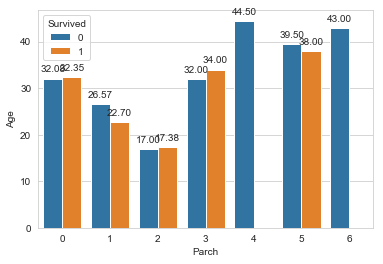

In [42]:
label_chart(sns.barplot(x='Parch', y='Age', data=train_df, hue='Survived', ci=None), points='.2f')

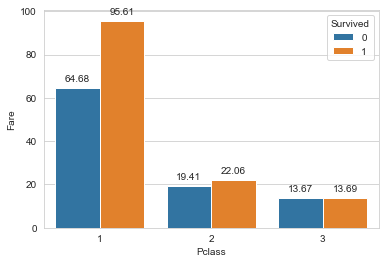

In [43]:
label_chart(sns.barplot(x='Pclass', y='Fare', data=train_df, hue='Survived', ci=None), points='.2f')

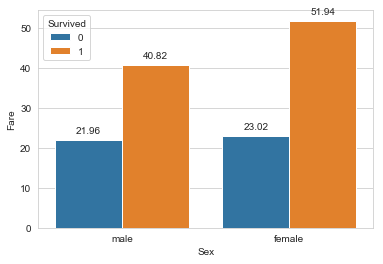

In [45]:
label_chart(sns.barplot(x='Sex', y='Fare', data=train_df, hue='Survived', ci=None), points='.2f')

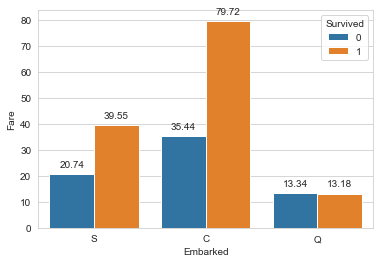

In [46]:
label_chart(sns.barplot(x='Embarked', y='Fare', data=train_df, hue='Survived', ci=None), points='.2f')

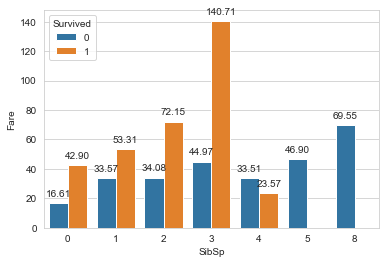

In [47]:
label_chart(sns.barplot(x='SibSp', y='Fare', data=train_df, hue='Survived', ci=None), points='.2f')

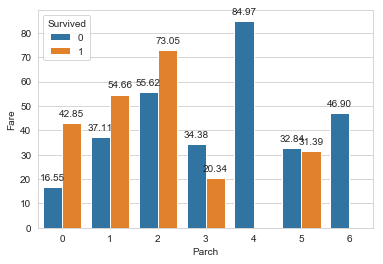

In [48]:
label_chart(sns.barplot(x='Parch', y='Fare', data=train_df, hue='Survived', ci=None), points='.2f')

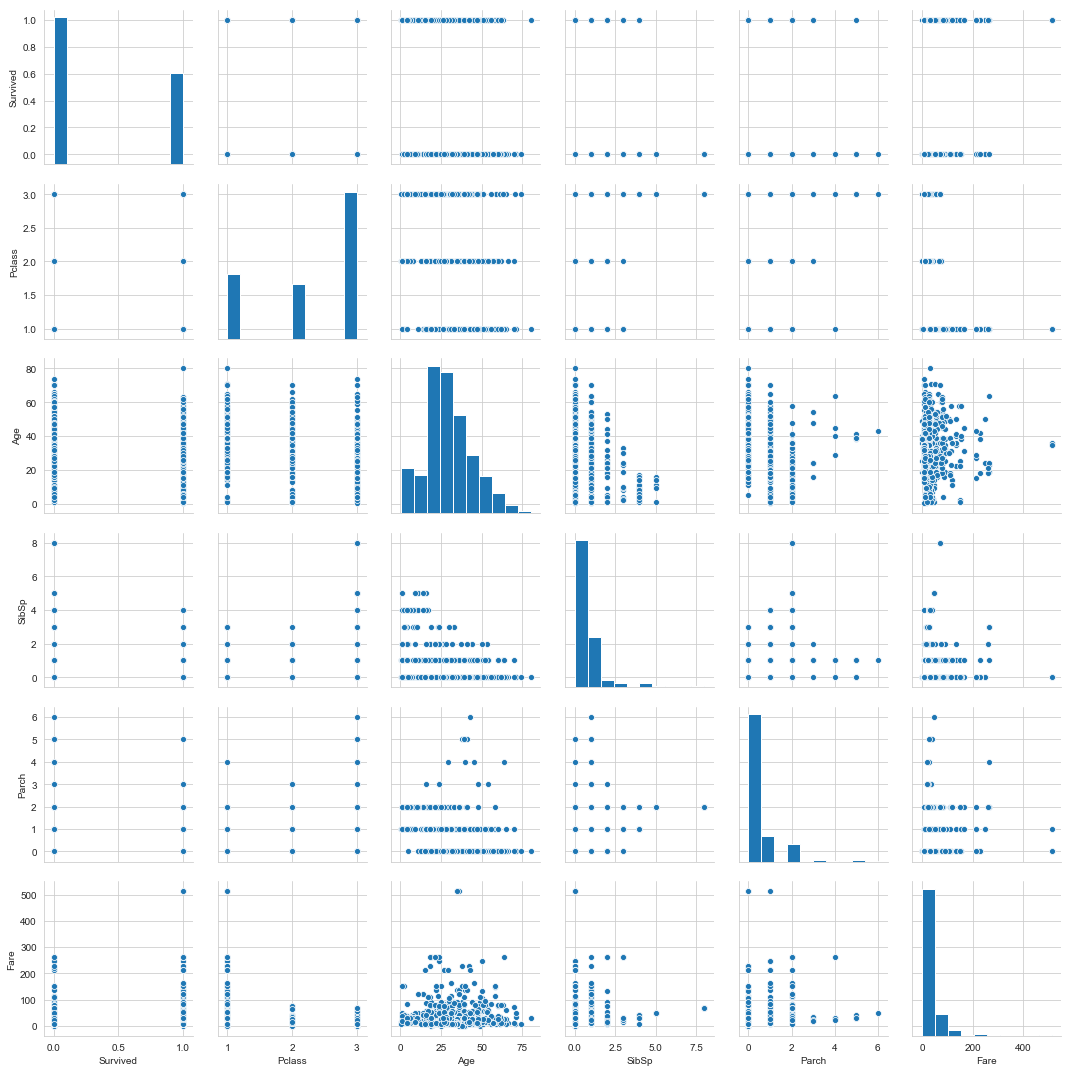

In [49]:
sns.pairplot(train_df.drop('PassengerId', axis=1))